In [1]:
import numpy as np
import pandas as pd 

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
Wine= pd.read_csv('Wine_Rating_Price.csv')

In [3]:
print(Wine.describe())
print(Wine.info())

             Rating  NumberOfRatings         Price
count  13834.000000     13834.000000  13834.000000
mean       3.865664       428.322466     33.024850
std        0.296427      1838.413812     70.899893
min        2.200000        25.000000      3.150000
25%        3.700000        56.000000      9.902500
50%        3.900000       129.000000     15.950000
75%        4.100000       336.000000     32.500000
max        4.900000     94287.000000   3410.790000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13834 entries, 0 to 13833
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             13834 non-null  object 
 1   Country          13834 non-null  object 
 2   Region           13834 non-null  object 
 3   Winery           13834 non-null  object 
 4   Rating           13834 non-null  float64
 5   NumberOfRatings  13834 non-null  int64  
 6   Price            13834 non-null  float64
 7   Year          

In [4]:
Wine['Year'] = Wine['Year'].replace('N.V.', 0)
Wine['Year'] = Wine['Year'].astype('int')

In [5]:
print(Wine.describe())
print(Wine.info())

             Rating  NumberOfRatings         Price          Year
count  13834.000000     13834.000000  13834.000000  13834.000000
mean       3.865664       428.322466     33.024850   1907.135391
std        0.296427      1838.413812     70.899893    454.699562
min        2.200000        25.000000      3.150000      0.000000
25%        3.700000        56.000000      9.902500   2014.000000
50%        3.900000       129.000000     15.950000   2016.000000
75%        4.100000       336.000000     32.500000   2018.000000
max        4.900000     94287.000000   3410.790000   2020.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13834 entries, 0 to 13833
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             13834 non-null  object 
 1   Country          13834 non-null  object 
 2   Region           13834 non-null  object 
 3   Winery           13834 non-null  object 
 4   Rating           13834 non

In [6]:
Wine.Winery.nunique()

3505

In [7]:
Wine.Region.nunique()

861

In [8]:
Wine.Country.nunique()

33

In [9]:
Wine.Country.value_counts().head(20)

Italy            3919
France           3436
Spain            1533
Germany          1229
South Africa      846
United States     530
Austria           492
Chile             431
Portugal          336
Australia         318
Argentina         308
New Zealand       165
Brazil             50
Romania            37
Greece             25
Switzerland        23
Israel             23
Hungary            19
Slovenia           18
Lebanon            16
Name: Country, dtype: int64

In [10]:
total_country = Wine.Country.value_counts()[:20] 

In [11]:
Wine.Region.value_counts().head(50)

Rioja                      385
Stellenbosch               337
Pfalz                      331
Toscana                    307
Champagne                  263
Südtirol - Alto Adige      227
Mosel                      217
Saint-Émilion Grand Cru    207
Terre Siciliane            176
Barolo                     175
Brunello di Montalcino     168
Ribera del Duero           166
Rheinhessen                163
Chianti Classico           159
Burgenland                 157
Mendoza                    149
California                 143
Rheingau                   137
Baden                      134
Pays d'Oc                  132
Veneto                     129
Marlborough                124
Pomerol                    118
Western Cape               113
Saint-Julien               110
Margaux                    109
Colchagua Valley           108
Nahe                       105
Puglia                     104
Châteauneuf-du-Pape        100
Douro                      100
Haut-Médoc                  98
Salento 

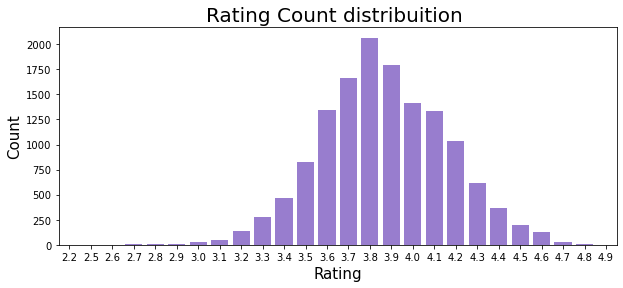

In [12]:
plt.figure(figsize=(10, 4))
graph = sns.countplot(x='Rating', data=Wine, color='mediumpurple')
graph.set_title("Rating Count distribuition ", fontsize=20)
graph.set_xlabel("Rating", fontsize=15) 
graph.set_ylabel("Count", fontsize=15)
plt.show()

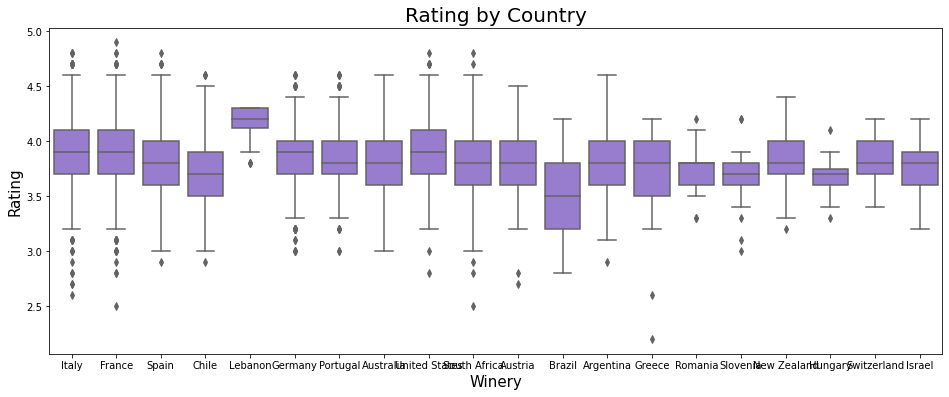

In [13]:
plt.figure(figsize=(16,6))

graph = sns.boxplot(x='Country', y='Rating',
                 data=Wine[Wine.Country.isin(total_country.index.values)],
                 color='mediumpurple')
graph.set_title("Rating by Country", fontsize=20)
graph.set_xlabel("Winery", fontsize=15)
graph.set_ylabel("Rating", fontsize=15)
graph.set_xticklabels(graph.get_xticklabels())

plt.show()

In [17]:
total_Country = Wine['Country'].value_counts()[:100].index #most productive country
print(Wine[Wine['Country'].isin(total_Country)].groupby('Country').Rating.mean().sort_values(ascending=False)[:20])

Country
Moldova           4.175000
Lebanon           4.137500
Croatia           4.083333
Czech Republic    4.050000
United Kingdom    4.033333
Georgia           3.976923
France            3.932829
United States     3.888302
Italy             3.880225
Germany           3.867779
Portugal          3.862202
New Zealand       3.843636
Switzerland       3.826087
Luxembourg        3.821429
Austria           3.815650
Argentina         3.814610
Spain             3.809915
South Africa      3.802246
Bulgaria          3.800000
Australia         3.788050
Name: Rating, dtype: float64


In [25]:
total_regions = Wine['Region'].value_counts()[:100].index #most productive regions
print(Wine[Wine['Region'].isin(total_regions)].groupby('Region').Rating.mean().sort_values(ascending=False)[:20])

Region
Brunello di Montalcino                 4.253571
Amarone della Valpolicella Classico    4.242222
Hermitage                              4.236111
Pauillac                               4.222581
Saint-Julien                           4.188182
Amarone della Valpolicella             4.183784
Châteauneuf-du-Pape                    4.171000
Pessac-Léognan                         4.132955
Napa Valley                            4.131034
Primitivo di Manduria                  4.114516
Pomerol                                4.111864
Barolo                                 4.111429
Priorat                                4.105263
Champagne                              4.102281
Margaux                                4.083486
Saint-Émilion Grand Cru                4.079710
Gigondas                               4.062222
Barossa Valley                         4.031579
Saint-Estèphe                          4.026027
Ribera del Duero                       4.004217
Name: Rating, dtype: float64


<ipython-input-26-ecca7415fd8f>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  graph.set_xticklabels(np.exp(graph.get_xticks()).astype(int))


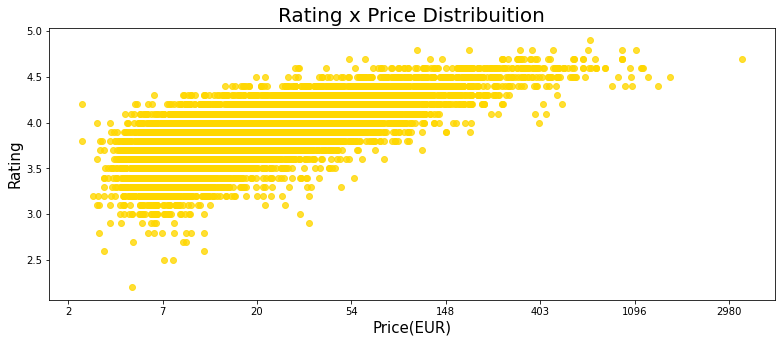

In [26]:
plt.figure(figsize=(13,5))

graph = sns.regplot(x=np.log(Wine['Price']), y='Rating', 
                    data=Wine, fit_reg=False, color='gold')
graph.set_title("Rating x Price Distribuition", fontsize=20)
graph.set_xlabel("Price(EUR)", fontsize= 15)
graph.set_ylabel("Rating", fontsize= 15)
graph.set_xticklabels(np.exp(graph.get_xticks()).astype(int))

plt.show()

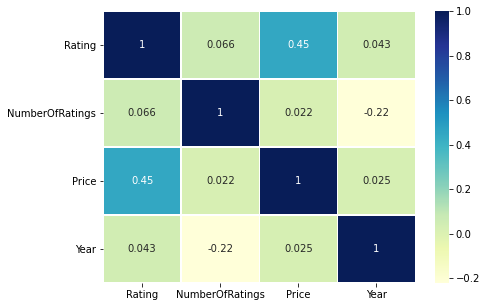

In [27]:
corrs = Wine[['Rating','NumberOfRatings','Price','Year']].corr() #Heatmap for numetrical columns
fig, ax = plt.subplots(figsize=(7,5))        

sns.heatmap(corrs,annot = True,ax=ax,linewidths=.6, cmap = 'YlGnBu');

In [ ]:
Wine.corr()[['Rating']].sort_values(by='Rating', ascending=False)


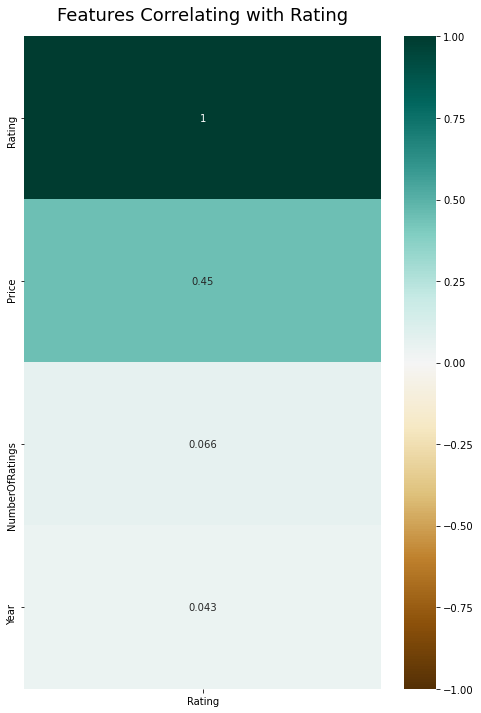

In [29]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(Wine.corr()[['Rating']].sort_values(by='Rating', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Rating', fontdict={'fontsize':18}, pad=16);